In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import time
from DataLoader import DataLoader
from Model import Net
from EarlyStop import EarlyStopping
USE_GPU = True
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

LOAD_DATA = True
BATCH_SIZE = 5
LEARNING_RATE = 1e-3
EPOCHS = 100
PATIENCE = 20
MODEL_NAME = f"model-{int(time.time())}"


cpu


In [5]:
if LOAD_DATA:
    trainpath = 'traindata.xlsx'
    valpath = 'valdata.xlsx'
    testpath = 'testdata.xlsx'
    
    traindata = DataLoader(batch_size = BATCH_SIZE, path = trainpath)
    valdata = DataLoader(batch_size = 2, path = valpath)
    testdata = DataLoader(batch_size = 1, path = testpath)

#traindata.makeimage(10)

100
10
10


In [6]:
def train(net, model_name, patience):
    
    optimizer = optim.Adam(net.parameters(), LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    loss_function = nn.MSELoss()
    
    validate_every = 2

    train_losses = []
    val_losses = []
    avg_train_losses = []
    avg_val_losses = []
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    with open("model.log", "a") as f:
        for epoch in tqdm(range(EPOCHS)):
                net.train()
                for idx in range(traindata.getbatchnum()):
                    x, y = traindata.getbatch()
                    x = x.view(-1, 1, 64, 64)

                    net.zero_grad()
                    pred = net(x)
                    loss = loss_function(pred, y)
                    loss.backward()
                    optimizer.step()
                    
                    error = (pred - y) / y
                    error = error.mean(0)
                    train_losses.append(loss.item())
                    
                    #if idx%validate_every == 0:
                net.eval()
                for ii in range(valdata.getbatchnum()):
                    val_x, val_y = valdata.getbatch()
                    val_x = val_x.view(-1, 1, 64, 64)
                    val_pred = net(val_x)
                    val_loss = loss_function(val_pred, val_y)
                    val_error = (val_pred - val_y) / val_y
                    val_error = val_error.mean(0)
                    val_losses.append(val_loss.item())
                    
                train_loss = np.average(train_losses)
                valid_loss = np.average(val_losses)
                avg_train_losses.append(train_loss)
                avg_val_losses.append(valid_loss)
                
                train_losses = []
                val_losses = []
                
                f.write(f"{MODEL_NAME},{round(time.time(),3)},  {round(float(loss), 4)},  {round(float(val_loss),4)}\n")
                print("batch : ", idx)
                print("loss : ", loss, "\nval loss : ", val_loss, "\n")
                print("error : ", error, "\nval error : ", val_error)
                
                early_stopping(valid_loss, net)
                
                if early_stopping.early_stop:
                    print("Early stopping")
                    break
        # load the last checkpoint with the best model
        net.load_state_dict(torch.load('checkpoint.pt'))
        
        return avg_train_losses, avg_val_losses

In [7]:
traindata.reset()
valdata.reset()
net = Net()
train_loss, valid_loss = train(net, MODEL_NAME, PATIENCE)

  1%|▊                                                                                 | 1/100 [00:01<02:46,  1.68s/it]

batch :  19
loss :  tensor(27.6363, grad_fn=<MseLossBackward>) 
val loss :  tensor(31.7684, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0316,  0.3134,  1.2023,  0.1685, -0.1609], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.6085, -0.5107, -0.6495, -0.1432,  0.6498], grad_fn=<MeanBackward1>)
Validation loss decreased (inf --> 20.288520).  Saving model ...


  2%|█▋                                                                                | 2/100 [00:03<02:43,  1.67s/it]

batch :  19
loss :  tensor(16.8531, grad_fn=<MseLossBackward>) 
val loss :  tensor(22.2518, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0046, -0.0940,  0.0347,  0.2804, -0.4048], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3803, -0.4566, -0.5544,  0.0724,  1.2534], grad_fn=<MeanBackward1>)
Validation loss decreased (20.288520 --> 18.103358).  Saving model ...


  3%|██▍                                                                               | 3/100 [00:04<02:41,  1.67s/it]

batch :  19
loss :  tensor(31.1657, grad_fn=<MseLossBackward>) 
val loss :  tensor(24.8701, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1858, -0.3183, -0.2566, -0.3961, -0.6058], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4043, -0.5380, -0.5509, -0.0811,  0.9891], grad_fn=<MeanBackward1>)
EarlyStopping counter: 1 out of 20


  4%|███▎                                                                              | 4/100 [00:06<02:38,  1.65s/it]

batch :  19
loss :  tensor(28.5602, grad_fn=<MseLossBackward>) 
val loss :  tensor(15.1955, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.1146,  0.3676,  0.0778, -0.1706, -0.5319], grad_fn=<MeanBackward1>) 
val error :  tensor([ 0.0243, -0.0766, -0.3185,  0.6075,  2.4398], grad_fn=<MeanBackward1>)
EarlyStopping counter: 2 out of 20


  5%|████                                                                              | 5/100 [00:08<02:42,  1.71s/it]

batch :  19
loss :  tensor(19.5341, grad_fn=<MseLossBackward>) 
val loss :  tensor(18.0099, grad_fn=<MseLossBackward>) 

error :  tensor([0.2259, 0.3599, 1.2540, 0.4823, 0.0095], grad_fn=<MeanBackward1>) 
val error :  tensor([ 0.0361, -0.0446, -0.2902,  0.7569,  2.6966], grad_fn=<MeanBackward1>)
EarlyStopping counter: 3 out of 20


  6%|████▉                                                                             | 6/100 [00:10<02:38,  1.68s/it]

batch :  19
loss :  tensor(16.0607, grad_fn=<MseLossBackward>) 
val loss :  tensor(14.6582, grad_fn=<MseLossBackward>) 

error :  tensor([0.4510, 0.2632, 1.1094, 1.1190, 0.0531], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.0526, -0.1078, -0.3751,  0.6307,  2.2522], grad_fn=<MeanBackward1>)
EarlyStopping counter: 4 out of 20


  7%|█████▋                                                                            | 7/100 [00:11<02:38,  1.70s/it]

batch :  19
loss :  tensor(19.4368, grad_fn=<MseLossBackward>) 
val loss :  tensor(14.5807, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.3541,  0.4082,  0.7007,  0.2559, -0.2441], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.0117, -0.0507, -0.2871,  0.6474,  2.4118], grad_fn=<MeanBackward1>)
EarlyStopping counter: 5 out of 20


  8%|██████▌                                                                           | 8/100 [00:13<02:37,  1.71s/it]

batch :  19
loss :  tensor(11.7100, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.8964, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0911,  0.1994,  0.2796,  0.0616, -0.3611], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.0701, -0.1519, -0.3649,  0.4692,  2.1926], grad_fn=<MeanBackward1>)
Validation loss decreased (18.103358 --> 16.543332).  Saving model ...


  9%|███████▍                                                                          | 9/100 [00:15<02:35,  1.71s/it]

batch :  19
loss :  tensor(15.0424, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.3916, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.1331,  0.2544,  0.7764,  0.8128, -0.2793], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.0146, -0.1124, -0.3170,  0.3912,  2.3007], grad_fn=<MeanBackward1>)
EarlyStopping counter: 1 out of 20


 10%|████████                                                                         | 10/100 [00:16<02:34,  1.71s/it]

batch :  19
loss :  tensor(14.9624, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.3473, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0524,  0.1499,  0.6662,  0.3285, -0.4219], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1829, -0.2475, -0.4252,  0.2120,  1.7598], grad_fn=<MeanBackward1>)
Validation loss decreased (16.543332 --> 14.377189).  Saving model ...


 11%|████████▉                                                                        | 11/100 [00:18<02:32,  1.72s/it]

batch :  19
loss :  tensor(13.9647, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.8965, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.3617,  0.3801,  0.7075,  0.0652, -0.0914], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.0677, -0.1406, -0.3385,  0.5841,  2.2029], grad_fn=<MeanBackward1>)
EarlyStopping counter: 1 out of 20


 12%|█████████▋                                                                       | 12/100 [00:20<02:29,  1.70s/it]

batch :  19
loss :  tensor(15.6096, grad_fn=<MseLossBackward>) 
val loss :  tensor(14.0388, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0644,  0.1469,  0.3894,  0.2203, -0.4065], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1342, -0.2298, -0.4383,  0.4301,  1.8749], grad_fn=<MeanBackward1>)
EarlyStopping counter: 2 out of 20


 13%|██████████▌                                                                      | 13/100 [00:22<02:26,  1.69s/it]

batch :  19
loss :  tensor(13.6876, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.1867, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0018, -0.0658,  0.1529,  0.1620, -0.4055], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1110, -0.1485, -0.3579,  0.4930,  2.0861], grad_fn=<MeanBackward1>)
EarlyStopping counter: 3 out of 20


 14%|███████████▎                                                                     | 14/100 [00:23<02:23,  1.66s/it]

batch :  19
loss :  tensor(15.8968, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.9914, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.2526,  0.4205,  0.3262,  0.5774, -0.3813], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2018, -0.2785, -0.4604,  0.2546,  1.6183], grad_fn=<MeanBackward1>)
EarlyStopping counter: 4 out of 20


 15%|████████████▏                                                                    | 15/100 [00:25<02:21,  1.67s/it]

batch :  19
loss :  tensor(12.1724, grad_fn=<MseLossBackward>) 
val loss :  tensor(17.8151, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.2281,  0.0438,  0.2862,  0.4962, -0.2582], grad_fn=<MeanBackward1>) 
val error :  tensor([ 0.0832, -0.0583, -0.2568,  0.6496,  2.7396], grad_fn=<MeanBackward1>)
EarlyStopping counter: 5 out of 20


 16%|████████████▉                                                                    | 16/100 [00:26<02:17,  1.64s/it]

batch :  19
loss :  tensor(18.2106, grad_fn=<MseLossBackward>) 
val loss :  tensor(16.0450, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1305, -0.1865,  0.1201, -0.0586, -0.4664], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2605, -0.3273, -0.4861,  0.1882,  1.5550], grad_fn=<MeanBackward1>)
EarlyStopping counter: 6 out of 20


 17%|█████████████▊                                                                   | 17/100 [00:28<02:15,  1.63s/it]

batch :  19
loss :  tensor(14.4625, grad_fn=<MseLossBackward>) 
val loss :  tensor(15.5768, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0902,  0.1809,  0.5940,  0.4528, -0.2748], grad_fn=<MeanBackward1>) 
val error :  tensor([ 0.0220, -0.0553, -0.3092,  0.6304,  2.4931], grad_fn=<MeanBackward1>)
EarlyStopping counter: 7 out of 20


 18%|██████████████▌                                                                  | 18/100 [00:30<02:13,  1.63s/it]

batch :  19
loss :  tensor(15.4144, grad_fn=<MseLossBackward>) 
val loss :  tensor(12.6410, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.1767, -0.0223,  0.0956,  0.0572, -0.4049], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1119, -0.1773, -0.4097,  0.4082,  1.8996], grad_fn=<MeanBackward1>)
EarlyStopping counter: 8 out of 20


 19%|███████████████▍                                                                 | 19/100 [00:31<02:11,  1.62s/it]

batch :  19
loss :  tensor(17.7567, grad_fn=<MseLossBackward>) 
val loss :  tensor(12.8898, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0376,  0.0069,  0.2296, -0.0386, -0.4017], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.0857, -0.1574, -0.3716,  0.4682,  2.0416], grad_fn=<MeanBackward1>)
EarlyStopping counter: 9 out of 20


 20%|████████████████▏                                                                | 20/100 [00:33<02:08,  1.61s/it]

batch :  19
loss :  tensor(10.3792, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.8670, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.1864,  0.1936,  0.5588,  0.3373, -0.2783], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1689, -0.2586, -0.4371,  0.3072,  1.7713], grad_fn=<MeanBackward1>)
EarlyStopping counter: 10 out of 20


 21%|█████████████████                                                                | 21/100 [00:34<02:07,  1.61s/it]

batch :  19
loss :  tensor(12.9544, grad_fn=<MseLossBackward>) 
val loss :  tensor(17.5563, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.3299,  0.3377,  0.6883,  0.2137, -0.2744], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3017, -0.3733, -0.5404,  0.0968,  1.2749], grad_fn=<MeanBackward1>)
EarlyStopping counter: 11 out of 20


 22%|█████████████████▊                                                               | 22/100 [00:36<02:06,  1.63s/it]

batch :  19
loss :  tensor(12.1589, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.9443, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.3962,  0.3162,  0.5567,  0.2780, -0.1398], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1272, -0.2198, -0.4333,  0.3900,  1.9214], grad_fn=<MeanBackward1>)
EarlyStopping counter: 12 out of 20


 23%|██████████████████▋                                                              | 23/100 [00:38<02:07,  1.65s/it]

batch :  19
loss :  tensor(16.5987, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.9575, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.5188,  0.2991,  0.1839,  0.6770, -0.2148], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.0786, -0.1583, -0.3726,  0.5100,  2.1557], grad_fn=<MeanBackward1>)
EarlyStopping counter: 13 out of 20


 24%|███████████████████▍                                                             | 24/100 [00:39<02:06,  1.66s/it]

batch :  19
loss :  tensor(14.1255, grad_fn=<MseLossBackward>) 
val loss :  tensor(15.9363, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0075,  0.0221,  0.5650,  0.1968, -0.3381], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2755, -0.3194, -0.4954,  0.2315,  1.4860], grad_fn=<MeanBackward1>)
EarlyStopping counter: 14 out of 20


 25%|████████████████████▎                                                            | 25/100 [00:41<02:08,  1.72s/it]

batch :  19
loss :  tensor(17.5233, grad_fn=<MseLossBackward>) 
val loss :  tensor(14.3096, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0822, -0.0554,  0.2509,  0.1718, -0.4320], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1374, -0.2395, -0.4251,  0.4012,  1.9252], grad_fn=<MeanBackward1>)
EarlyStopping counter: 15 out of 20


 26%|█████████████████████                                                            | 26/100 [00:43<02:04,  1.69s/it]

batch :  19
loss :  tensor(19.4408, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.3789, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.5903,  0.4941,  0.9923,  0.7700, -0.1359], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.0635, -0.1500, -0.3582,  0.5369,  2.1203], grad_fn=<MeanBackward1>)
EarlyStopping counter: 16 out of 20


 27%|█████████████████████▊                                                           | 27/100 [00:45<02:03,  1.69s/it]

batch :  19
loss :  tensor(11.9928, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.9500, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.1325,  0.1658,  0.7648,  0.4129, -0.2226], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1649, -0.2171, -0.4135,  0.3746,  1.9311], grad_fn=<MeanBackward1>)
EarlyStopping counter: 17 out of 20


 28%|██████████████████████▋                                                          | 28/100 [00:46<02:00,  1.67s/it]

batch :  19
loss :  tensor(14.6701, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.9053, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0029, -0.0059,  0.2286,  0.3960, -0.3979], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1708, -0.2402, -0.4299,  0.3016,  1.8451], grad_fn=<MeanBackward1>)
EarlyStopping counter: 18 out of 20


 29%|███████████████████████▍                                                         | 29/100 [00:48<01:58,  1.67s/it]

batch :  19
loss :  tensor(13.3850, grad_fn=<MseLossBackward>) 
val loss :  tensor(15.2659, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0738, -0.0010,  0.1212,  0.1140, -0.3896], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2464, -0.3114, -0.4846,  0.1617,  1.5419], grad_fn=<MeanBackward1>)
EarlyStopping counter: 19 out of 20
batch :  19
loss :  tensor(13.2841, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.1576, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0328,  0.0170,  0.4370,  0.1445, -0.3694], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1343, -0.2064, -0.4117,  0.3479,  1.9021], grad_fn=<MeanBackward1>)
EarlyStopping counter: 20 out of 20
Early stopping


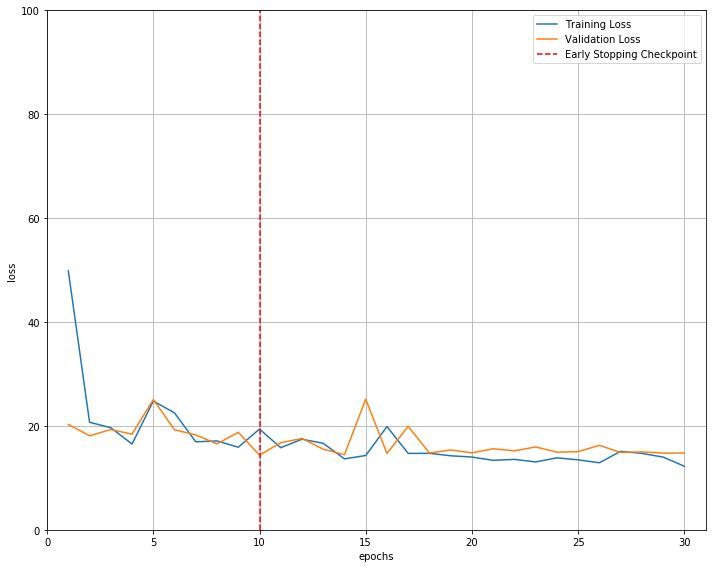

In [8]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 100) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [9]:
def test(net):
    data = pd.read_excel(open('testdata.xlsx', 'rb'), sheet_name = 'Sheet1', header = None)
    data = torch.from_numpy( np.array(data) ).float()
    data = data.reshape(-1,1,64,64)

    labels = pd.read_excel(open('testdata.xlsx', 'rb'), sheet_name = 'Sheet2', header = None)
    labels = torch.from_numpy( np.array(labels) ).float()

    with torch.no_grad():


            test_size = len(labels)
            predict = net(data)

            error = predict - labels
            relative_error = error / labels

            pred_df = DataFrame(predict.numpy())
            pred_df.to_csv('prediction.csv')

            rel_df = DataFrame(relative_error.numpy())
            rel_df.to_csv('error.csv')

In [10]:
test(net)